In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ! pip install seaborn

In [3]:
data =  pd.read_excel('data/Data.xlsx')
data.head()

,ID,X1,X2,X3,Z1,Z2,A,B,Y
0,1001,6.44,2.0,1.00,5,16.0,738,0.0,11.0
1,1002,0.00,0.0,0.00,4,2.0,315,0.0,0.0
2,1003,18.50,3.0,2.50,108,64.0,11415,205302.1,21.0
3,1004,4.32,1.0,0.50,0,6.0,561,0.0,7.0
4,1005,0.00,0.0,7.16,890,55.0,0,0.0,0.0


In [4]:
data_without_0 = data[data['Y'] != 0]
data_without_0.shape

(30, 9)

In [5]:
X = data_without_0.drop('Y',axis=1).reset_index(drop=True)
X.drop('ID',axis=1,inplace=True)
y = data_without_0['Y'].reset_index(drop = True)


In [6]:
X.fillna(X.mean(),inplace=True)

In [7]:
features =  list(X.columns)

## Steps:
1. Scale the data
2. INitialize random centroids
3. Label each data point
4. Update Centroids
5. Repeat Steps 3 and 4 until centroid stop changing

## Scaling using MIn Max

In [8]:
#Scaling to have values from 1 to 10
X = (X - X.min()) / (X.max() - X.min()) * 9 + 1

In [9]:
X.describe()

,X1,X2,X3,Z1,Z2,A,B
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,4.846060,3.024747,3.140565,2.866590,3.448385,3.725196,2.932634
std,2.281273,1.952508,2.505700,2.169352,2.450423,2.348621,2.954207
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.228510,1.866635,1.440217,1.398169,1.640823,2.125763,1.083992
50%,4.785458,2.299952,1.880435,2.036613,2.594937,3.166893,1.279668
75%,6.694842,4.089552,5.108696,3.112700,4.161392,4.559937,2.989707
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
X.head()

,X1,X2,X3,Z1,Z2,A,B
0,2.362464,1.866635,1.195652,1.034325,1.455696,1.051478,1.000000
1,4.954155,2.299952,1.782609,1.741419,2.822785,4.156762,1.233654
2,1.906877,1.433317,1.000000,1.000000,1.170886,1.000000,1.000000
3,6.821633,4.397208,7.534783,3.135011,2.594937,7.840233,8.716105
4,4.569484,2.733269,1.586957,5.661327,4.816456,4.448473,1.203102


## Initializing random centroids

In [11]:
def random_centroids(X,k):
    centroids = []

    for i in range(k):
        centroid = X.apply(lambda x : float(x.sample())) # random centroid
        centroids.append(centroid)

    return pd.concat(centroids,axis=1)



In [12]:
centroids = random_centroids(X,4)

C:\Users\sathw\AppData\Local\Temp\ipykernel_23720\1084653886.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = X.apply(lambda x : float(x.sample())) # random centroid


In [13]:
centroids

,0,1,2,3
X1,5.201289,3.127507,2.362464,3.664756
X2,1.433317,2.650939,2.299952,2.299952
X3,6.028261,6.028261,1.978261,2.369565
Z1,10.000000,2.187643,1.645309,5.173913
Z2,2.566456,2.594937,1.598101,2.822785
A,4.029666,1.000000,6.162094,4.055550
B,1.000000,1.290038,8.696665,7.390535


In [14]:
def get_labels(X,centroids):
    distances = centroids.apply(lambda x: np.sqrt(((X - x) **2).sum(axis = 1)))
    return distances.idxmin(axis=1)
    
    

In [15]:
labels = get_labels(X,centroids)

In [16]:
labels.value_counts()

1    20
3     8
2     1
0     1
Name: count, dtype: int64

In [17]:
def new_centroids(X, labels,k):
    return X.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [19]:
def plot_clusters(X,labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(X)
    centroids_2d = pca.transform(centroids.T)
    
    clear_output(wait=True)
    
    plt.title(f'Iteration{iteration}')
    plt.scatter(x = data_2d[:,0], y = data_2d[:,1], c = labels)
    plt.scatter(x = centroids_2d[:,0], y = centroids_2d[:,1], c = 'red')
    plt.show()

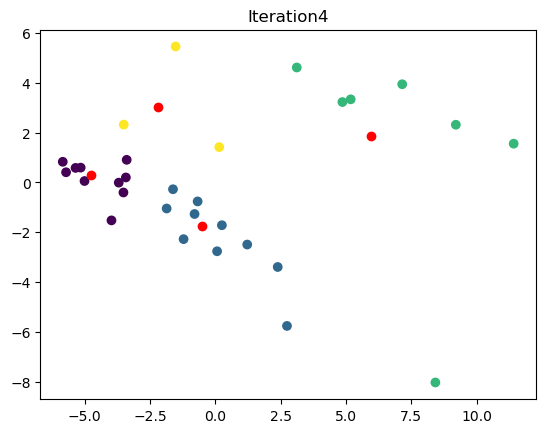

In [20]:
max_iterations = 100
k = 4

centroids = random_centroids(X,k)
# print(centroids)
old_centroids = pd.DataFrame()
iteration = 1

while(iteration<max_iterations) and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(X,centroids)
    # print(labels)
    # print(old_centroids)
        
    centroids = new_centroids(X, labels, k)
    # print(centroids)
    plot_clusters(X,labels,centroids, iteration)
    
    iteration += 1

In [21]:
centroids

,0,1,2,3
X1,2.245115,5.795803,6.994922,3.942322
X2,2.126414,2.376475,4.322135,2.078774
X3,1.220874,1.946844,5.804234,6.003822
Z1,1.268921,3.065893,4.144891,1.591124
Z2,1.663080,4.066440,4.131630,1.724545
A,1.807441,4.085223,6.027402,1.315162
B,1.208993,1.431366,7.306000,1.760816


In [22]:
X[labels==1]

,X1,X2,X3,Z1,Z2,A,B
1,4.954155,2.299952,1.782609,1.741419,2.822785,4.156762,1.233654
4,4.569484,2.733269,1.586957,5.661327,4.816456,4.448473,1.203102
7,5.706304,2.299952,1.978261,7.260870,2.993671,4.029666,1.037793
9,7.870344,7.062109,2.760870,2.963387,3.392405,6.558216,1.079234
11,6.813037,1.433317,2.369565,2.276888,2.338608,3.032671,1.098264
12,5.469914,2.299952,2.702174,2.695652,8.376582,3.042850,3.027355
15,7.704871,5.796822,1.978261,1.885584,8.661392,5.506253,1.290038
22,6.340258,1.433317,1.586957,5.173913,3.193038,2.964033,1.269298
25,4.442693,1.433317,1.586957,2.187643,6.439873,3.110616,1.761074
27,5.201289,1.433317,1.586957,2.640732,2.566456,5.655162,2.265007


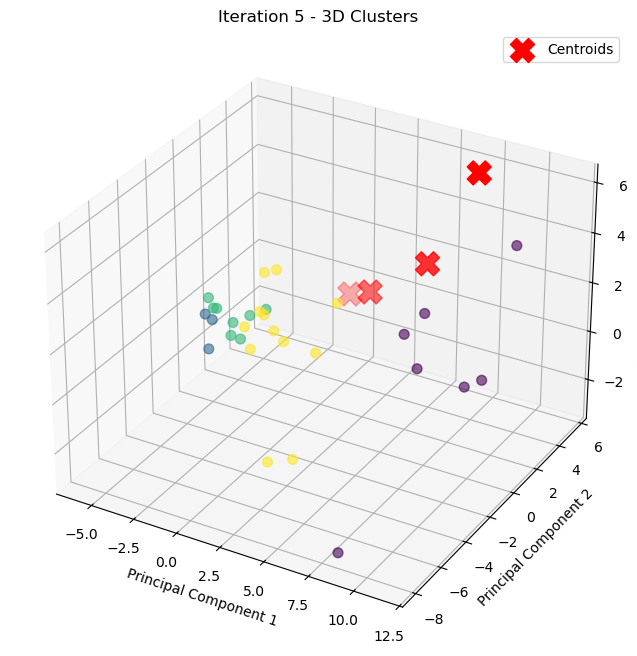

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Function to randomly initialize centroids
def random_centroids(X, k):
    return X.sample(n=k).values  # Randomly sample k centroids

# Function to calculate the labels based on the nearest centroid
def get_labels(X, centroids):
    # Calculate Euclidean distance between each point and centroids
    distances = np.linalg.norm(X.values[:, None] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Function to calculate new centroids (mean of the data points in each cluster)
def new_centroids(X, labels, k):
    return X.groupby(labels).mean().values  # Return centroids as NumPy array

# Function to plot clusters in 3D
def plot_clusters_3d(X, labels, centroids, iteration):
    # Perform PCA to reduce data to 3 components
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    # Create a 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot data points with labels (colors will be based on cluster labels)
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', s=50, alpha=0.6)

    # Convert centroids to NumPy array for 3D plotting
    centroids = np.array(centroids)

    clear_output(wait=True)

    # Plot centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X', label='Centroids')

    # Set labels and title
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title(f'Iteration {iteration} - 3D Clusters')

    # Show legend
    ax.legend()
    
    # Show plot
    plt.show()

# Main loop for clustering
max_iterations = 100
k = 4
  # Example dataset

centroids = random_centroids(X, k)
old_centroids = pd.DataFrame()
iteration = 1

while (iteration < max_iterations) and not np.array_equal(centroids, old_centroids):
    old_centroids = centroids
    
    labels = get_labels(X, centroids)
    centroids = new_centroids(X, labels, k)
    
    # Plot clusters in 3D for the current iteration
    plot_clusters_3d(X, labels, centroids, iteration)
    
    iteration += 1